<a href="https://colab.research.google.com/github/AIMSS-UAlberta/AI_Models_Lecture_2023/blob/main/Some_AI_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

In [ ]:
#Necessary libraries

#math
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#DATA
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import accuracy_score,classification_report
#NOTE: confusion_matrix and roc_curve are other metrics you can work with and get valuable information from
#you can read more about how we can quantify the quality of our prediction here: https://scikit-learn.org/stable/modules/model_evaluation.html


#MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
#mount the drive to have access to the datasets on google drive through colab
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset_directory = '/content/gdrive/My Drive/AIMSS/heart.csv'
data = pd.read_csv(dataset_directorry) 
#NOTE: you should change this address to the directory on your own google drive where you store the dataset
#link to dataset : https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#data preprocessing

# 1- split data into train and test
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# 2 - make sure data is balanced.
#practice: why do you think balance in data is important, and how do you think we can handle imbalance?
unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print(f"label: {unique_elements[0]} count: {counts_elements[0]}")
print(f"label: {unique_elements[1]} count: {counts_elements[1]}")

#3 - scale the data
#NOTE: read about why scaling the data is important here:
# https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


label: 0 count: 111
label: 1 count: 131


# **Decision Tree**


In [ ]:
#train the model
decision_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
decision_tree = decision_tree.fit(X_train, y_train)

#test the model
decision_tree_predicted = decision_tree.predict(X_test)
decision_tree_acc_score = accuracy_score(y_test, decision_tree_predicted)
print("Accuracy for Decision Tree:",decision_tree_acc_score*100,'\n')
print(classification_report(y_test,decision_tree_predicted))

#visualize the model and results
feature_names = list(data.columns.values)[:-1]
print(export_text(decision_tree, feature_names=feature_names))

#practice: change the value of max_depth,criterion, etc and see their effect on the accuracy


Accuracy for Decision Tree: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

|--- cp <= -0.45
|   |--- ca <= -0.22
|   |   |--- thal <= 0.34
|   |   |   |--- thalach <= -1.31
|   |   |   |   |--- class: 0
|   |   |   |--- thalach >  -1.31
|   |   |   |   |--- exang <= 0.35
|   |   |   |   |   |--- chol <= 1.31
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  1.31
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- exang >  0.35
|   |   |   |   |   |--- restecg <= -0.04
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- restecg >  -0.04
|   |   |   |   |   |   |--- class: 0
|   |   |--- thal >  0.34
|   |   |   |--- oldpeak <= -0.35
|   |   |   |   |--- a

#**K Nearest Neighbors**

In [ ]:
#train the model
KNN = KNeighborsClassifier(n_neighbors = 10) #try other n_neighbors values
KNN = KNN.fit(X_train, y_train)

#test the model
KNN_predicted = KNN.predict(X_test)
KNN_acc_score = accuracy_score(y_test, KNN_predicted)
print("Accuracy for KNN:",KNN_acc_score*100,'\n')
print(classification_report(y_test,KNN_predicted))

#visualize the model and results
#TODO: PCA?

#practice: change the value of n_neighbors and see its effect on the accuracy. find the best value for n_neighbors
#can you think of a systematic way to find the optimal k value? (hint: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)
#challenge yourself to implement the idea for finding the optimal k value in python and test it on the heart dataset!


Accuracy for KNN: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



# **Logistic Regression**

In [ ]:
#train the model
model = LogisticRegression()
model = model.fit(X_train, y_train)

#test the model
model_predicted = model.predict(X_test)
model_acc_score = accuracy_score(y_test, KNN_predicted)
print("Accuracy for KNN:",model_acc_score*100,'\n')
print(classification_report(y_test,model_predicted))

#visualize the model and results
print(f"weigths: {model.coef_}") # it is a matrix with the size of #classes*#features)

#practice: read about the parameters of LogisticRegression in sklearn and think about how
#they might affect the accuracy : https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html

Accuracy for KNN: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

weigths: [[-0.07554609 -0.86419891  0.79641426 -0.1929562  -0.24758964 -0.13386133
   0.09180366  0.50500584 -0.47863218 -0.64516548  0.13456573 -0.884006
  -0.45962413]]


# **Linear Regression**

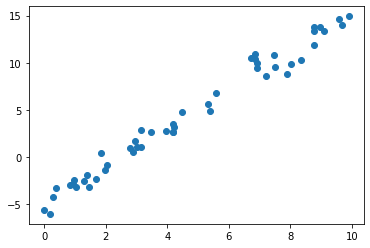

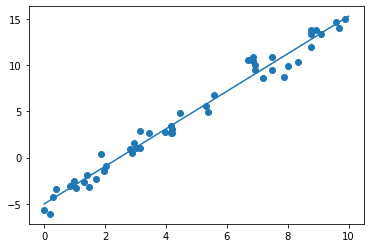

In [ ]:
#generate random data
rnstate = np.random.RandomState(1)
x = 10 * rnstate.rand(50)
y = 2 * x - 5 + rnstate.randn(50)
plt.scatter(x, y);
plt.show()

# train a linear regression model to fit the data
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot the result
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

#practice: read about the parameters of LinearRegression in sklearn and think about how
#they might affect the model and the results :https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



# **Convolutional Neural Networks**

# **Resources**

It's good practice to visit the **documentation** of the libraries that you use most for your tasks. Libraries such as numpy, pandas, matplotlib, sklearn, keras, tensorflow, pytorch, etc.
Here are the links to some of them:

https://numpy.org/doc/ \
https://pandas.pydata.org/docs/ \
https://matplotlib.org/stable/index.html \
https://scikit-learn.org/stable/ \
https://keras.io/examples/ \
https://pytorch.org/docs/stable/index.html \


You can also find the answer to many of your questions in the rich community of these frameworks. Also, some communities such as **stackoverflow** can lead you to the answer to your problems. \

There are many datasets that are publicly available, and you can use them to practice. These datasets can be found in:

https://archive.ics.uci.edu/ml/datasets.php \
https://www.kaggle.com/datasets \


Finally, some links I got help from for preparing this notebook: \


https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/

https://www.kaggle.com/code/nareshbhat/heart-attack-prediction-using-different-ml-models




